# Phân tích mức tiêu hao nhiên liệu

## 1. ĐỌC DỮ LIỆU

Dữ liệu `mpg.csv` gồm các thông tin như sau:

- **mpg**: Miles/(US) gallon số gallon xăng trên 1 dặm
- **cylinders:** số lượng xilanh
- **displacement:**  Displacement/ dung tích xilanh (cu.in / $inches^3$)
- **horsepower:** công suất theo mã lực
- **weight:** trọng lượng (pound)
- **acceleration:** Gia tốc
- **model_year:** Năm sản xuất
- **origin:** Xuất xứ
- **name:** Tên dòng xe


## 2. TÌM HIỂU DỮ LIỆU

### 2.1 Kiểm tra có dòng nào không có dữ liệu?

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_df = pd.read_csv('./mpg.csv')
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [23]:
# data_null =  data_df.isnull()
# print(data_null)

# data_df.isnull()

data_Rong = data_df[data_df.isnull().any(axis = 1)]
print(data_Rong)


data_df[data_df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


### 2.2 Xóa các dòng không có dữ liệu


In [30]:
a = data_df[data_df.isnull().any(axis = 1)]
data_df.dropna(axis=1)

,mpg,cylinders,displacement,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,2625,18.6,82,usa,ford ranger


### 2.3 Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'

In [47]:
mean_1 = data_df['cylinders'].mean()
print('Trung binh cylinders')
print(mean_1)
print('Trung vi cylinders')
median_1 = data_df['cylinders'].median()
print(median_1)
print('----------------')

mean_2 = data_df['horsepower'].mean()
print('Trung binh horsepower')
print(mean_2)
print('Trung vi horsepower')
median_2 = data_df['horsepower'].median()
print(median_2)
print('----------------')

mean_3 = data_df['weight'].mean()
print('Trung binh weight')
print(mean_3)
print('Trung vi weight')
median_3 = data_df['weight'].median()
print(median_3)
print('----------------')



Trung binh cylinders
5.454773869346734
Trung vi cylinders
4.0
----------------
Trung binh horsepower
104.46938775510205
Trung vi horsepower
93.5
----------------
Trung binh weight
2970.424623115578
Trung vi weight
2803.5
----------------


### 2.4 Tìm miền giá trị và miền phân vị của thuộc tính 'mpg'

In [85]:
des = data_df['mpg'].describe()
print(des)
# data_df['mpg'].describe()

Mien_GT = data_df['mpg'].max() - data_df['mpg'].min()
print("\nMiền giá trị: ")
print(Mien_GT)

print("\nMiền phân vị: ")
Q1 =  data_df['mpg'].quantile(0.25)
Q3 = data_df['mpg'].quantile(0.75) 
print(f'Q1: {Q1}')
print(f'Q1: {Q3}')

IQR = Q3 - Q1
print(f'IQR: {IQR}')


count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Miền giá trị: 
37.6

Miền phân vị: 
Q1: 17.5
Q1: 29.0
IQR: 11.5


## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

So sánh mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ, Nhật và Châu Âu

In [67]:
data_df.groupby('origin')['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

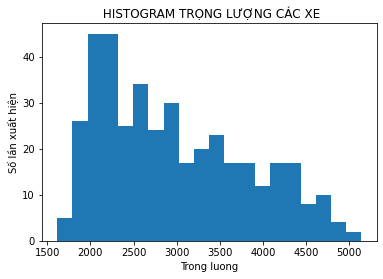

In [83]:
# Vẽ bằng matplotlib
import matplotlib.pyplot as plt

plt.hist(data_df["weight"], bins=20)
plt.title(" HISTOGRAM TRỌNG LƯỢNG CÁC XE")
plt.xlabel("Trong luong")
plt.ylabel("Số lần xuất hiện")
plt.show()

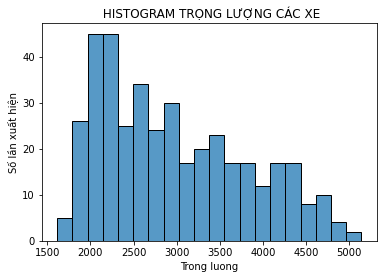

In [40]:
# Vẽ bằng seaborn
import seaborn as sns

sns.histplot(data=data_df["weight"], bins=20)
plt.title(" HISTOGRAM TRỌNG LƯỢNG CÁC XE")
plt.xlabel("Trong luong")
plt.ylabel("Số lần xuất hiện")
plt.show()

## 5. TÍNH TỶ LỆ CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

In [91]:
origin_counts = data_df['origin'].value_counts()
origin_rate = origin_counts/len(data_df) *100
print("Tổng")
print(origin_counts)

print("\nTỷ lệ")
print(origin_rate)

Tổng
usa       249
japan      79
europe     70
Name: origin, dtype: int64

Tỷ lệ
usa       62.562814
japan     19.849246
europe    17.587940
Name: origin, dtype: float64


## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

Lưu ý: Các dòng xe thập niên 70 (1970 - 1979), thập niên 80 (1980 - 1989)

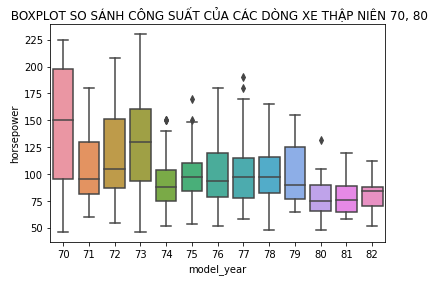

In [42]:
sns.boxplot(data=data_df, x ='model_year', y = 'horsepower')
plt.title(" BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80")
plt.show()

## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

<AxesSubplot:xlabel='cylinders'>

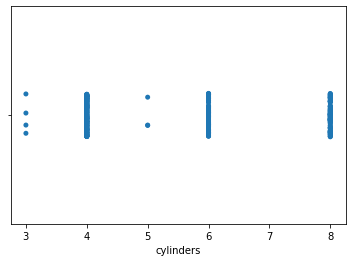

In [71]:
sns.stripplot(x ='cylinders',data=data_df)

In [82]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.randn(100)
sizes = 1000
plt.scatter(x ,y,s =sizes, c =colors,smap = 'viridis', alpha= 0.5, smap = 'viridis')

SyntaxError: keyword argument repeated (<ipython-input-82-f958c8f92d79>, line 6)

### 7.2 Với công suất theo mã lực

<AxesSubplot:xlabel='horsepower'>

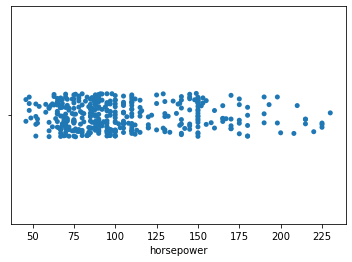

In [61]:
sns.stripplot(x ='horsepower',data=data_df)

### 7.3 Với gia tốc

<AxesSubplot:xlabel='acceleration'>

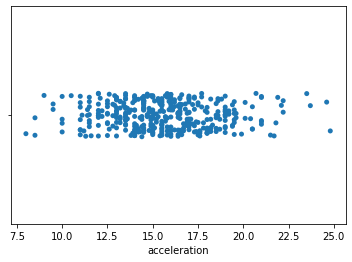

In [62]:
sns.stripplot(x ='acceleration',data=data_df)

### 7.4 Với năm sản xuất

<AxesSubplot:xlabel='model_year'>

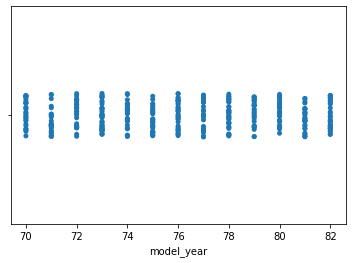

In [63]:
sns.stripplot(x ='model_year',data=data_df)